<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/mlc_2324_w2_webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

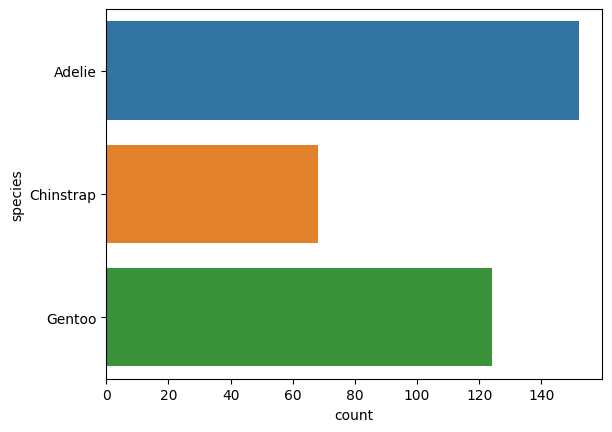

In [ ]:
sns.countplot(data=penguins, y='species');

In [ ]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

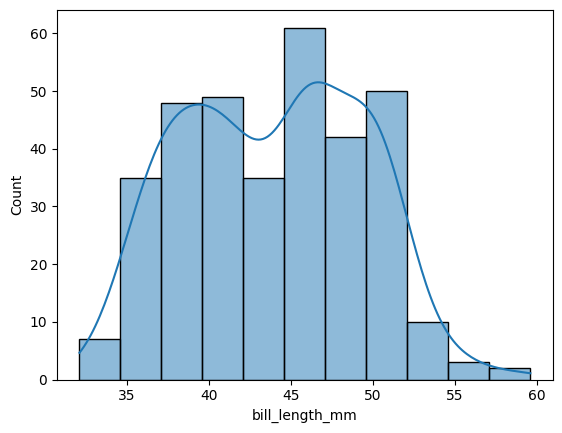

In [ ]:
sns.histplot(data=penguins, x='bill_length_mm', kde=True);

<Axes: xlabel='body_mass_g'>

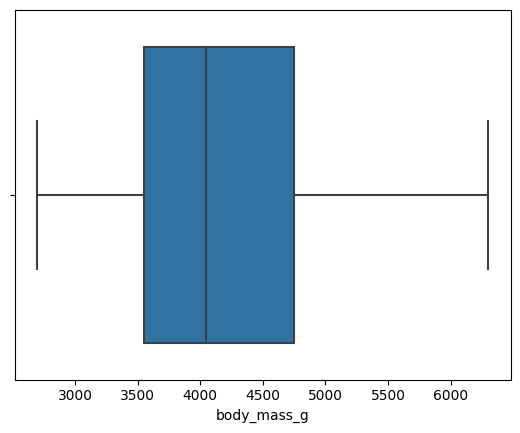

In [ ]:
sns.boxplot(data=penguins, x='body_mass_g')

<Axes: xlabel='body_mass_g', ylabel='Count'>

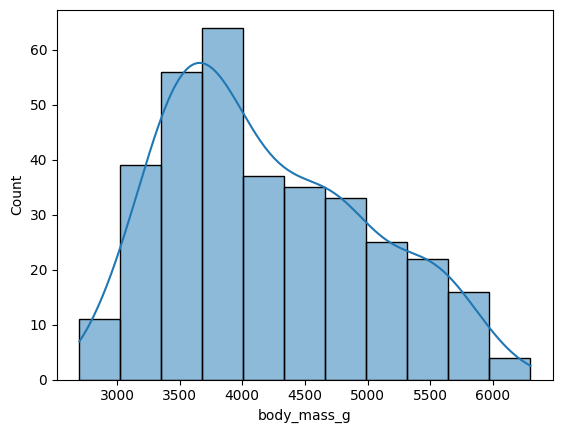

In [ ]:
sns.histplot(data=penguins, x='body_mass_g', kde=True)

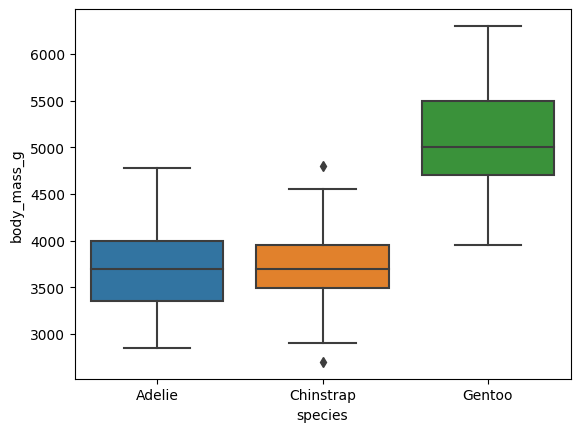

In [ ]:
sns.boxplot(data=penguins, x='species', y='body_mass_g');

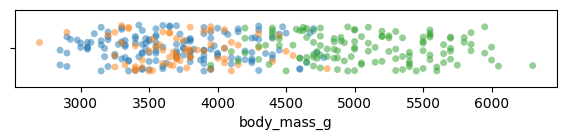

In [ ]:
fig, ax = plt.subplots(figsize=(7,1))
sns.stripplot(
    data=penguins, x='body_mass_g', hue='species',
    jitter=0.3, alpha=0.5, legend=False, ax=ax
);

In [ ]:
penguins = penguins.drop(columns=['island', 'sex'])

In [ ]:
penguins.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [ ]:
penguins.head(1)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0


In [ ]:
X = penguins.drop(columns='species')
y = penguins['species']

In [ ]:
X.head(1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0


In [ ]:
y.head(1)

0    Adelie
Name: species, dtype: object

In [ ]:
X.mean()

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

In [ ]:
# machine learning will break if the data has missing values!
# let us a very simple strategy - fill in the missing values with the mean value
# for each column
X.fillna(X.mean()).head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


In [ ]:
X.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [ ]:
X = X.fillna(X.mean())

In [ ]:
X.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


## Machine Learning Part

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((275, 4), (275,), (69, 4), (69,))

In [ ]:
knnc = KNeighborsClassifier(n_neighbors=11)

In [ ]:
knnc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
knnc.score(X_test, y_test), knnc.score(X_train, y_train)

(0.782608695652174, 0.8218181818181818)

In [ ]:
knnc = KNeighborsClassifier(n_neighbors=21)
knnc.fit(X_train, y_train)
knnc.score(X_test, y_test), knnc.score(X_train, y_train)

(0.7101449275362319, 0.7745454545454545)

In [ ]:
knnc = KNeighborsClassifier(n_neighbors=5)
knnc.fit(X_train, y_train)
knnc.score(X_test, y_test), knnc.score(X_train, y_train)

(0.7971014492753623, 0.8363636363636363)

In [ ]:
knnc = KNeighborsClassifier(n_neighbors=1)
knnc.fit(X_train, y_train)
knnc.score(X_test, y_test), knnc.score(X_train, y_train)

(0.8260869565217391, 0.9963636363636363)

In [ ]:
knnc = KNeighborsClassifier(n_neighbors=51)
knnc.fit(X_train, y_train)
knnc.score(X_test, y_test), knnc.score(X_train, y_train)

(0.782608695652174, 0.7418181818181818)

In [ ]:
X_test.iloc[[0]]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
141,40.6,17.2,187.0,3475.0


In [ ]:
knnc.predict(X_test.iloc[[0]])

array(['Adelie'], dtype=object)

In [ ]:
y_test.iloc[0]

'Adelie'